<a href="https://colab.research.google.com/github/mrjohnokolie/recipes/blob/main/bayes_cat_cop_urban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SIGNIFICANT CHANGES
- Fold_count increasd from 3 to 5
- inclusuon of early stopping in bayes

LAST TEST (FOR REFERENCE ONLY)
- COP:
- urban - bayes wins
- mount - bayes wins
- cult - bayes wins
- grass  - bayes wins
- pen - default wins

- AW3D:
- urban - default wins
- mount - bayes wins
- cult -
- grass  -
- pen -

In [ ]:
# GPU INFO

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Mar 20 18:44:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    55W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# MEMORY INFO

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from numpy.random import seed
seed(42)

In [ ]:
# Import training/test/val data

from google.colab import files
uploaded = files.upload()

Saving LIDAR_30m_cubic_pts_clean_parameters_egm08_clip_vt_cl_clean2_C_lc1.csv to LIDAR_30m_cubic_pts_clean_parameters_egm08_clip_vt_cl_clean2_C_lc1.csv


In [ ]:
# Install all packages

!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install --upgrade ngboost
!pip install -U scikit-learn
!pip install bayesian-optimization
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 10.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bac54bdeb924ab84e2db88acc71095732aa222f245908503cd25447a1570ad6f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Looking in inde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.4 MB/s eta 0:00:00


In [ ]:
# Import libraries

import pandas  as pd
import numpy   as np

import lightgbm as lgb
import catboost as cgb
import xgboost as xgb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from matplotlib import pyplot
from numpy import absolute
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
import joblib
from matplotlib import pyplot as plt

# K-fold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Accuracy metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Additional
import math
from scipy.stats import uniform
import time #2
from sklearn.inspection import permutation_importance
from xgboost import plot_importance
#from pdpbox import pdp, get_dataset, info_plots
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# Regressors
from sklearn.ensemble import AdaBoostRegressor
from ngboost import NGBRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from bayes_opt import BayesianOptimization
import seaborn as sns # for correlation heatmap


In [ ]:
# CHECKPOINT 1 - check the ordering and sequence of variables

# Read training/test/val data

data = pd.read_csv("LIDAR_30m_cubic_pts_clean_parameters_egm08_clip_vt_cl_clean2_C_lc1.csv")
data = data.reset_index()
X,y = data.iloc[:,7:18], data.iloc[:,6]
X

,Elevation (m),Slope (°),Aspect (°),Surface Roughness,Topographic Position Index,Terrain Ruggedness Index,Terrain Surface Texture,Vector Ruggedness Measure,Urban Footprints,Tree Cover (%),Bare Ground (%)
0,75.9805,10.317200,93.651100,12.680000,-0.954994,13.76960,8.23096,0.001158,0,0,56
1,71.2677,1.129060,7.355830,1.902990,-0.137886,1.85501,5.72577,0.000166,0,0,56
2,71.5583,2.468990,0.662697,3.486920,0.457199,3.53932,5.84074,0.000955,0,0,50
3,72.4668,0.496221,357.513000,0.860489,0.207817,1.02334,6.04102,0.000136,0,0,63
4,71.0890,10.181800,172.348000,11.958800,1.472720,14.19370,7.96051,0.002194,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
573372,47.0386,9.355440,353.809000,12.696000,2.612470,14.53280,51.21100,0.007061,0,56,0
573373,94.3539,15.600600,50.647900,21.491100,-0.962494,20.47030,19.65190,0.002313,0,5,16
573374,28.8407,10.419500,27.918400,12.356100,1.812480,14.83000,34.00440,0.007655,0,0,85
573375,25.5998,8.256610,100.236000,11.437600,3.461480,14.79980,36.80850,0.004058,255,0,31


,Elevation (m),Slope (°),Aspect (°),Surface Roughness,Topographic Position Index,Terrain Ruggedness Index,Terrain Surface Texture,Vector Ruggedness Measure,Urban Footprints,Tree Cover (%),Bare Ground (%)
count,573377.000000,573377.000000,573377.000000,573377.000000,573377.000000,573377.000000,573377.000000,5.733770e+05,573377.000000,573377.000000,573377.000000
mean,48.711294,1.995967,180.727314,3.226829,-0.010462,3.549810,9.544041,4.278047e-04,159.013154,4.433071,28.022392
std,43.935923,2.049168,98.238863,2.763637,0.793191,2.921080,7.517579,8.560823e-04,123.544315,8.462017,22.209130
min,0.007287,0.000063,0.000816,0.000188,-10.236500,0.000185,0.009919,-6.300000e-09,0.000000,0.000000,0.000000
25%,17.611200,0.726329,96.535100,1.471600,-0.390598,1.652450,3.872260,6.990000e-05,0.000000,0.000000,11.000000
50%,32.988600,1.326300,184.298000,2.340540,-0.034302,2.619930,7.382290,1.626220e-04,255.000000,0.000000,22.000000
75%,63.180900,2.497750,262.058000,4.017010,0.326111,4.454860,13.089500,4.151520e-04,255.000000,6.000000,41.000000
max,320.846000,30.886600,359.998000,42.928500,8.370030,44.479400,53.589600,3.894840e-02,255.000000,99.000000,100.000000


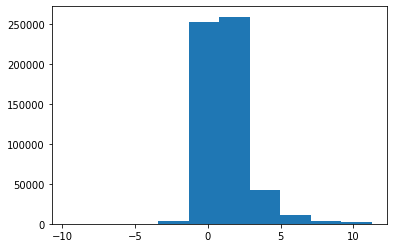

In [ ]:
# CHECKPOINT 2 - check y for wrong values, inspect the data range, min, max etc


plt.hist(y)
data.describe
X.describe() # for summary stats


In [ ]:
# CHECKPOINT 3 - check y for wrong values, inspect the data range, min, max etc

y.describe()

count    573377.000000
mean          1.237890
std           1.479044
min          -9.672501
25%           0.343300
50%           0.918600
75%           1.751301
max          11.253601
Name: Elevation Diff, ∆h (m), dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573377 entries, 0 to 573376
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       573377 non-null  int64  
 1   pointid                     573377 non-null  int64  
 2   easting                     573377 non-null  float64
 3   northing                    573377 non-null  float64
 4   Land Type                   573377 non-null  int64  
 5   LiDAR Elevation (m)         573377 non-null  float64
 6   Elevation Diff, ∆h (m)      573377 non-null  float64
 7   Elevation (m)               573377 non-null  float64
 8   Slope (°)                   573377 non-null  float64
 9   Aspect (°)                  573377 non-null  float64
 10  Surface Roughness           573377 non-null  float64
 11  Topographic Position Index  573377 non-null  float64
 12  Terrain Ruggedness Index    573377 non-null  float64
 13  Terrain Surfac

In [ ]:
# CHECKPOINT 4

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573377 entries, 0 to 573376
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Elevation (m)               573377 non-null  float64
 1   Slope (°)                   573377 non-null  float64
 2   Aspect (°)                  573377 non-null  float64
 3   Surface Roughness           573377 non-null  float64
 4   Topographic Position Index  573377 non-null  float64
 5   Terrain Ruggedness Index    573377 non-null  float64
 6   Terrain Surface Texture     573377 non-null  float64
 7   Vector Ruggedness Measure   573377 non-null  float64
 8   Urban Footprints            573377 non-null  int64  
 9   Tree Cover (%)              573377 non-null  int64  
 10  Bare Ground (%)             573377 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 48.1 MB


In [ ]:
# CHECKPOINT 5

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 573377 entries, 0 to 573376
Series name: Elevation Diff, ∆h (m)
Non-Null Count   Dtype  
--------------   -----  
573377 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB


In [ ]:
# Train/val - 80%, Test - 20% (I invoked cv() for XGBoost, CatBoost and LightGBM which alredy reports training and validation metrics, so here I'm holding out 20% for independent testing)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(458701, 11)
(458701,)
(114676, 11)
(114676,)


(None, None)

**BAYESIAN OPTIMISATION**


In [ ]:
# Bayesian tutorials

# https://github.com/fmfn/BayesianOptimization
# https://medium.com/analytics-vidhya/hyperparameters-optimization-for-lightgbm-catboost-and-xgboost-regressors-using-bayesian-6e7c495947a9
# https://colab.research.google.com/drive/1gWwUa3ASZLJTijy3JoJl_nEqHlwHVIeB
# bayesian main - https://github.com/fmfn/BayesianOptimization
# tutorial - https://colab.research.google.com/drive/1gWwUa3ASZLJTijy3JoJl_nEqHlwHVIeB#scrollTo=YLXcDMknNR2O, https://medium.com/analytics-vidhya/hyperparameters-optimization-for-lightgbm-catboost-and-xgboost-regressors-using-bayesian-6e7c495947a9
# https://github.com/dc-aichara/DS-ML-Public/blob/master/Medium_Files/hyp_tune.ipynb

In [ ]:
cat_features = []

cv_dataset = cgb.Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features)

In [ ]:
# Define objective function

def hyp_cat(depth, bagging_temperature, learning_rate, iterations, l2_leaf_reg, random_strength, border_count, colsample_bylevel, leaf_estimation_iterations):
    params = {
              "boosting_type": "Plain", # 'Ordered' usually provides better quality on small datasets, but it may be slower than the Plain scheme.
              "eval_metric": "RMSE",
              "loss_function": "RMSE",
              "verbose": True,
              "use_best_model": True,
              "random_state": 42}
    params["depth"] = int(round(depth))
    params["bagging_temperature"] = (bagging_temperature)
    params["learning_rate"] = (learning_rate)
    params["iterations"] = int(iterations)  # The maximum number of trees that can be built
    params["l2_leaf_reg"] = (l2_leaf_reg)
    params["random_strength"] = (random_strength)
    params["border_count"] = int(border_count)
    params["colsample_bylevel"] = (colsample_bylevel)
    params["leaf_estimation_iterations"] = int(leaf_estimation_iterations)
    scores = cgb.cv(cv_dataset,
                params,
                fold_count=5, num_boost_round=1000, early_stopping_rounds=10)
    return np.max(scores['test-RMSE-mean'])

In [ ]:
# Set hyperparamter bounds
# catboost - https://catboost.ai/en/docs/references/training-parameters/common#l2_leaf_reg

pds = {
    'depth': (1, 16), #good good
    'bagging_temperature': (0.0001, 10), #good good
    'learning_rate': (0.0001, 1), #good good
    'iterations': (1, 50000), #good good
    'l2_leaf_reg': (0.0001, 10),  # good good
    'random_strength': (0.0001, 10), #good good
    'border_count': (1, 255), #good good
    'colsample_bylevel': (0.0001, 1),  #good good
    'leaf_estimation_iterations': (1, 10)  #good good
    }

In [ ]:
# Surrogate model

optimizer = BayesianOptimization(hyp_cat, pds, verbose=2, random_state=42)

In [ ]:
# Run optimiser

# For additional parameters and visualisation options for Bayesian, visit https://github.com/fmfn/BayesianOptimization
# There are many parameters you can pass to maximize, nonetheless, the most important ones are:
# n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
# init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.

start_time = time.time()
optimizer.maximize(init_points=10, n_iter=50)
print("--- %s seconds ---" % (time.time() - start_time))

Streaming output truncated to the last 5000 lines.
414:	learn: 0.9335741	test: 0.9377859	best: 0.9377859 (414)	total: 3.25s	remaining: 4.58s
415:	learn: 0.9335741	test: 0.9377859	best: 0.9377859 (414)	total: 3.25s	remaining: 4.57s
416:	learn: 0.9335612	test: 0.9377764	best: 0.9377764 (416)	total: 3.26s	remaining: 4.56s
417:	learn: 0.9335592	test: 0.9377739	best: 0.9377739 (417)	total: 3.27s	remaining: 4.55s
418:	learn: 0.9335542	test: 0.9377734	best: 0.9377734 (418)	total: 3.28s	remaining: 4.54s
419:	learn: 0.9334633	test: 0.9376891	best: 0.9376891 (419)	total: 3.29s	remaining: 4.54s
420:	learn: 0.9334610	test: 0.9376854	best: 0.9376854 (420)	total: 3.29s	remaining: 4.53s
421:	learn: 0.9334218	test: 0.9376410	best: 0.9376410 (421)	total: 3.3s	remaining: 4.52s
422:	learn: 0.9332329	test: 0.9374997	best: 0.9374997 (422)	total: 3.31s	remaining: 4.51s
423:	learn: 0.9332329	test: 0.9374997	best: 0.9374997 (422)	total: 3.31s	remaining: 4.5s
424:	learn: 0.9332287	test: 0.9374996	best: 0.93749

In [ ]:
# The best combination of parameters and target value found can be accessed via the property optimizer.max.

optimizer.max

{'target': 1.9120882505342984,
 'params': {'bagging_temperature': 3.7916892685334296,
  'border_count': 186.84179895010064,
  'colsample_bylevel': 0.7498513606466211,
  'depth': 14.652013197398212,
  'iterations': 28644.628258570836,
  'l2_leaf_reg': 4.269177292281843,
  'leaf_estimation_iterations': 1.990317946206209,
  'learning_rate': 0.011404571678042498,
  'random_strength': 3.0058662364951974}}

In [ ]:
# While the list of all parameters probed and their corresponding target values is available via the property optimizer.res.
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': 1.0909465635599316, 'params': {'bagging_temperature': 3.7454637344617403, 'border_count': 242.4814338281187, 'colsample_bylevel': 0.7320207424172239, 'depth': 9.979877262955549, 'iterations': 7801.776003481384, 'l2_leaf_reg': 1.5600296039099928, 'leaf_estimation_iterations': 1.5227525095137953, 'learning_rate': 0.8661895281603577, 'random_strength': 6.011190005930914}}
Iteration 1: 
	{'target': 1.5543596577821037, 'params': {'bagging_temperature': 7.080754970702675, 'border_count': 6.2284615511338215, 'colsample_bylevel': 0.9699128611767781, 'depth': 13.486639612006327, 'iterations': 10617.74319480313, 'l2_leaf_reg': 1.8183314895742855, 'leaf_estimation_iterations': 2.650640588680904, 'learning_rate': 0.30431181873524177, 'random_strength': 5.247611840679215}}
Iteration 2: 
	{'target': 1.2262227107641324, 'params': {'bagging_temperature': 4.319506991919293, 'border_count': 74.97220161030265, 'colsample_bylevel': 0.6118917094329073, 'depth': 3.0924079097806274,

**MODEL FIT INITIAL - PERFORMANCE, LEARNING CURVES, EARLY STOPPING**

In [ ]:
# Eval_set

eval_set = [(X_train, y_train), (X_test, y_test)]

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Model fitting - default/initial

start_time = time.time()
cat_model = CatBoostRegressor().fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True, plot=True)
print("--- %s seconds ---" % (time.time() - start_time))

# eval_metric=["MAE","RMSE"],

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.133277
0:	learn: 1.3910341	test: 1.3910341	test1: 1.3952944	best: 1.3952944 (0)	total: 14.9ms	remaining: 14.9s
1:	learn: 1.3213985	test: 1.3213985	test1: 1.3252823	best: 1.3252823 (1)	total: 29.3ms	remaining: 14.6s
2:	learn: 1.2642358	test: 1.2642358	test1: 1.2680777	best: 1.2680777 (2)	total: 43.4ms	remaining: 14.4s
3:	learn: 1.2156110	test: 1.2156110	test1: 1.2191242	best: 1.2191242 (3)	total: 57.3ms	remaining: 14.3s
4:	learn: 1.1769357	test: 1.1769357	test1: 1.1801045	best: 1.1801045 (4)	total: 72.1ms	remaining: 14.4s
5:	learn: 1.1443746	test: 1.1443746	test1: 1.1472657	best: 1.1472657 (5)	total: 87.6ms	remaining: 14.5s
6:	learn: 1.1166120	test: 1.1166120	test1: 1.1193717	best: 1.1193717 (6)	total: 101ms	remaining: 14.4s
7:	learn: 1.0939135	test: 1.0939135	test1: 1.0967221	best: 1.0967221 (7)	total: 115ms	remaining: 14.3s
8:	learn: 1.0750212	test: 1.0750212	test1: 1.0774406	best: 1.0774406 (8)	total: 130ms	remaining: 14.3s
9:	learn: 1.0596429	test: 1.0596429	t

In [ ]:
#  The performance of the model on each evaluation set is stored and made available by the model after training by calling the model.evals_result() function. This returns a dictionary of evaluation datasets and scores

#  results1 = cat_model.evals_result()
#  print(results1)

In [ ]:
#  A specific array of results, such as for the first dataset and the error metric can be accessed as follows:
#  results1['validation_0']['mae']

In [ ]:
#  A specific array of results, such as for the first dataset and the error metric can be accessed as follows:
#  results1['validation_0']['rmse']

In [ ]:
# Retrieve performance metrics  - default/initial MAE
#  results1 = xgb_model.evals_result()
#  epochs1a = len(results1['validation_0']['mae'])
#  x_axis = range(0, epochs1a)


In [ ]:
# Plot mae - default/initial
#  fig, ax = pyplot.subplots(figsize = (5,4), dpi = 300)
#  ax.plot(x_axis, results1['validation_0']['mae'], label='Training')
#  ax.plot(x_axis, results1['validation_1']['mae'], label='Validation')
#  ax.legend()
#  pyplot.ylabel('MAE (m)')
#  pyplot.xlabel('Epoch')
#  pyplot.title('XGBoost Learning Curve (default parameters)')
#  pyplot.show()

In [ ]:
# Retrieve performance metrics - default/initial RMSE
#  epochs1b = len(results1['validation_0']['rmse'])
#  x_axis = range(0, epochs1b)


In [ ]:
# Plot RMSE  - default/initial
#  fig, ax = pyplot.subplots(figsize = (5,4), dpi = 300)
#  ax.plot(x_axis, results1['validation_0']['rmse'], label='Training')
#  ax.plot(x_axis, results1['validation_1']['rmse'], label='Validation')
#  ax.legend()
#  pyplot.ylabel('RMSE (m)')
#  pyplot.xlabel('Epoch')
#  pyplot.title('XGBoost Learning Curve (default parameters)')
#  pyplot.show()

**MODEL FIT BAYES - PERFORMANCE, LEARNING CURVES, EARLY STOPPING**

In [ ]:
#  You can Inspect the learning curves to check a suitable epoch for early stopping.
#  If multiple evaluation datasets or multiple evaluation metrics are provided, then early stopping will use the last in the list.
#  QUESTION: This trainign dataset I am fitting here, i am using the paramters that were derived during cv on the same training set, hope no data leakage?
# https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

start_time = time.time()
cat_model_best = CatBoostRegressor(depth=15,
        bagging_temperature=3.7916892685334296,
        learning_rate=0.011404571678042498,
        iterations=28645,
        l2_leaf_reg=4.269177292281843,
        random_strength=3.0058662364951974,
        border_count=187,
        colsample_bylevel=0.7498513606466211,
        leaf_estimation_iterations=2,
        random_state=42).fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True) # num_boost_round (denotes the number of trees you build) is analogous to n_estimators which I ahve already set in the params, so no need for duplication?)
print("--- %s seconds ---" % (time.time() - start_time))


0:	learn: 1.4691685	test: 1.4691685	test1: 1.4741111	best: 1.4741111 (0)	total: 833ms	remaining: 6h 37m 32s
1:	learn: 1.4602394	test: 1.4602394	test1: 1.4652530	best: 1.4652530 (1)	total: 1.56s	remaining: 6h 13m 26s
2:	learn: 1.4518702	test: 1.4518702	test1: 1.4569182	best: 1.4569182 (2)	total: 2.3s	remaining: 6h 6m 43s
3:	learn: 1.4434056	test: 1.4434056	test1: 1.4485223	best: 1.4485223 (3)	total: 3.21s	remaining: 6h 22m 59s
4:	learn: 1.4353761	test: 1.4353761	test1: 1.4405350	best: 1.4405350 (4)	total: 3.69s	remaining: 5h 51m 48s
5:	learn: 1.4280045	test: 1.4280045	test1: 1.4331171	best: 1.4331171 (5)	total: 3.91s	remaining: 5h 11m 14s
6:	learn: 1.4199628	test: 1.4199628	test1: 1.4252215	best: 1.4252215 (6)	total: 5.63s	remaining: 6h 23m 46s
7:	learn: 1.4121120	test: 1.4121120	test1: 1.4174743	best: 1.4174743 (7)	total: 6.5s	remaining: 6h 27m 32s
8:	learn: 1.4041762	test: 1.4041762	test1: 1.4096720	best: 1.4096720 (8)	total: 7.29s	remaining: 6h 26m 35s
9:	learn: 1.3965566	test: 1.396

In [ ]:
#  The performance of the model on each evaluation set is stored and made available by the model after training by calling the model.evals_result() function. This returns a dictionary of evaluation datasets and scores

#  results2 = xgb_model_best.evals_result()
#  print(results2)

In [ ]:
#  A specific array of results, such as for the first dataset and the error metric can be accessed as follows:

#  results2['validation_0']['mae']

In [ ]:
#  A specific array of results, such as for the first dataset and the error metric can be accessed as follows:

#  results2['validation_0']['rmse']

In [ ]:
# Retrieve performance metrics - Bayes MAE
#  results2 = xgb_model_best.evals_result()
#  epochs2a = len(results2['validation_0']['mae'])
#  x_axis = range(0, epochs2a)


In [ ]:
# Plot MAE - Bayes
#  fig, ax = pyplot.subplots(figsize=(5,4), dpi = 300)
#  ax.plot(x_axis, results2['validation_0']['mae'], label='Training')
#  ax.plot(x_axis, results2['validation_1']['mae'], label='Validation')
#  ax.legend()
#  pyplot.ylabel('MAE (m)')
#  pyplot.xlabel('Epoch')
#  pyplot.title('XGBoost Learning Curve (Bayesian optimisation)')
#  pyplot.show()

In [ ]:
# Retrieve performance metrics - Bayes RMSE
#  epochs2b = len(results2['validation_0']['rmse'])
#  x_axis = range(0, epochs2b)


In [ ]:
# Plot RMSE - Bayes
#  fig, ax = pyplot.subplots(figsize=(5,4), dpi = 300)
#  ax.plot(x_axis, results2['validation_0']['rmse'], label='Training')
#  ax.plot(x_axis, results2['validation_1']['rmse'], label='Validation')
#  ax.legend()
#  pyplot.ylabel('RMSE (m)')
#  pyplot.xlabel('Epoch')
#  pyplot.title('XGBoost Learning Curve (Bayesian optimisation)')
#  pyplot.show()

**PLOT DECISION TREES**

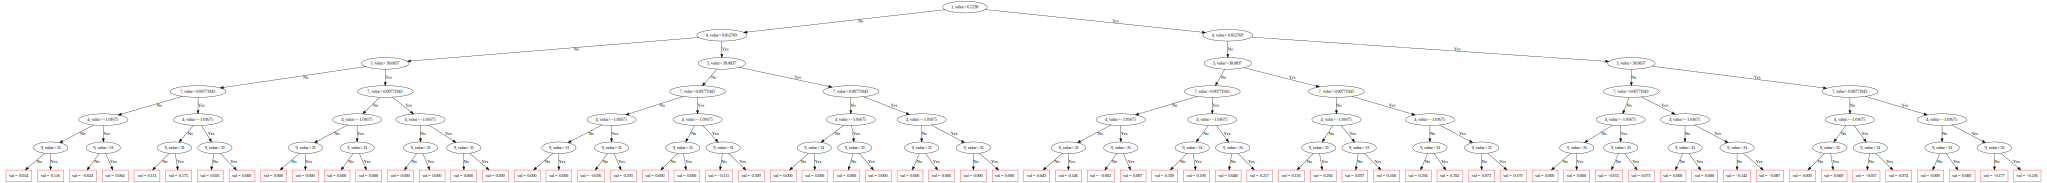

In [ ]:
# Initial
# let's look at the first tree of our model. - https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/visualize_decision_trees_tutorial.ipynb
#plt.figure()
cat_model.plot_tree(
    tree_idx=0,
    # pool=pool,
)
#plt.savefig('tree.eps',format='jpg',bbox_inches = "tight")

# from catboost import Pool
# plt.figure(figsize=(12,8))
# cat_model.plot_tree(tree_idx=0, pool=None)


**MODEL PREDICTIONS  - INITIAL**

In [ ]:
# Prediction on test set - default/initial
start_time = time.time()
y_pred_ts1 = cat_model.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.02863025665283203 seconds ---


In [ ]:
# Prediction on training set - default/initial

start_time = time.time()
y_pred_tr1 = cat_model.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.10540509223937988 seconds ---


**EXPORT Y_TEST AND Y_PRED FOR PLOTTING - INITIAL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# convert array into dataframe
DFpred = pd.DataFrame(y_pred_ts1)
DFtest = pd.DataFrame(y_test)

# save the dataframe as a csv file
DFpred.to_csv("/content/drive/My Drive/init_cat_cop_urban_y_pred_ts1.csv", index = False, header=True)
DFtest.to_csv("/content/drive/My Drive/init_cat_cop_urban_y_test.csv", index = False, header=True)

# read saved csvs
DFpred_csv = pd.read_csv("/content/drive/My Drive/init_cat_cop_urban_y_pred_ts1.csv")
DFtest_csv = pd.read_csv("/content/drive/My Drive/init_cat_cop_urban_y_test.csv")

# Merge files
DFmerge_csv = pd.concat([DFpred_csv, DFtest_csv], axis=1)

# Save to csv
DFmerge_csv.to_csv("/content/drive/My Drive/init_cat_cop_urban_y_pred_y_test_merge.csv", index = False, header=True)

**PREDICTION ERROR - INITIAL**

In [ ]:
# The training error and test error is simply the error when making predictions on the training set and test set, respectively. All you need to do is measure predictions on your training set and test set.
# https://stackoverflow.com/questions/52687493/find-the-training-and-test-error-in-my-self-implemented-knn-algorithm

# Test Error -  default/initial
test_mae1 = mean_absolute_error(y_test, y_pred_ts1)
test_mdae1 = median_absolute_error(y_test, y_pred_ts1) #robust to outliers
test_mse1 = mean_squared_error(y_test, y_pred_ts1)
test_rmse1 = mean_squared_error(y_test, y_pred_ts1, squared=False)
test_maxe1 = max_error(y_test, y_pred_ts1)
test_mape1 = mean_absolute_percentage_error(y_test, y_pred_ts1)
test_R21 = r2_score(y_test, y_pred_ts1)

In [ ]:
# Print Test Error - default/initial

print("\n")
print("Test error - initial")
print("test_mae:")
print(test_mae1)
print("test_mdae:")
print(test_mdae1)
print("test_mse:")
print(test_mse1)
print("test_rmse:")
print(test_rmse1)
print("test_maxe:")
print(test_maxe1)
print("test_mape:")
print(test_mape1)
print("test_R2:")
print(test_R21)



Test error - initial
test_mae:
0.5871636225880178
test_mdae:
0.40205997585989633
test_mse:
0.7687189021625481
test_rmse:
0.8767661616203879
test_maxe:
9.392324971984378
test_mape:
116627230634.24681
test_R2:
0.6504365806138623


In [ ]:
# Train Error - initial
# The training error should be the lowest because the model is fit on the training data? https://www.samlau.me/test-textbook/ch/15/bias_cv.html#:~:text=Also%2C%20note%20that%20the%20test,fit%20on%20the%20training%20data.

train_mae1 = mean_absolute_error(y_train, y_pred_tr1)
train_mdae1 = median_absolute_error(y_train, y_pred_tr1) #robust to outliers
train_mse1 = mean_squared_error(y_train, y_pred_tr1)
train_rmse1 = mean_squared_error(y_train, y_pred_tr1, squared=False)
train_maxe1 = max_error(y_train, y_pred_tr1)
train_mape1 = mean_absolute_percentage_error(y_train, y_pred_tr1)
train_R21 = r2_score(y_train, y_pred_tr1)

In [ ]:
# Print Train Error - initial
print("\n")
print("Train error - initial")
print("train_mae:")
print(train_mae1)
print("train_mdae:")
print(train_mdae1)
print("train_mse:")
print(train_mse1)
print("train_rmse:")
print(train_rmse1)
print("train_maxe:")
print(train_maxe1)
print("trrain_mape:")
print(train_mape1)
print("train_R2:")
print(train_R21)



Train error - initial
train_mae:
0.5710224422318859
train_mdae:
0.3990575703335968
train_mse:
0.7034812468541826
train_rmse:
0.8387378892444186
train_maxe:
9.943747044957657
trrain_mape:
129640273598.56117
train_R2:
0.6779941448611966


**MODEL PREDICTIONS - BAYES**

In [ ]:
# Prediction on test set - bayes
start_time = time.time()
y_pred_ts2 = cat_model_best.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.456836462020874 seconds ---


In [ ]:
# Prediction on training set - bayes

start_time = time.time()
y_pred_tr2 = cat_model_best.predict(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.8177993297576904 seconds ---


**EXPORT Y_TEST AND Y_PRED FOR PLOTTING - BAYES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# convert array into dataframe
DFpredb = pd.DataFrame(y_pred_ts2)
DFtestb = pd.DataFrame(y_test)

# save the dataframe as a csv file
DFpredb.to_csv("/content/drive/My Drive/bayes_cat_cop_urban_y_pred_ts2.csv", index = False, header=True)
DFtestb.to_csv("/content/drive/My Drive/bayes_cat_cop_urban_y_test.csv", index = False, header=True)

# read saved csvs
DFpredb_csv = pd.read_csv("/content/drive/My Drive/bayes_cat_cop_urban_y_pred_ts2.csv")
DFtestb_csv = pd.read_csv("/content/drive/My Drive/bayes_cat_cop_urban_y_test.csv")

# Merge files
DFmergeb_csv = pd.concat([DFpredb_csv, DFtestb_csv], axis=1)

# Save to csv
DFmergeb_csv.to_csv("/content/drive/My Drive/bayes_cat_cop_urban_y_pred_y_test_merge.csv", index = False, header=True)

**PREDICTION ERROR - BAYES**

In [ ]:
# Test Error -  bayes
test_mae2 = mean_absolute_error(y_test, y_pred_ts2)
test_mdae2 = median_absolute_error(y_test, y_pred_ts2) #robust to outliers
test_mse2 = mean_squared_error(y_test, y_pred_ts2)
test_rmse2 = mean_squared_error(y_test, y_pred_ts2, squared=False)
test_maxe2 = max_error(y_test, y_pred_ts2)
test_mape2 = mean_absolute_percentage_error(y_test, y_pred_ts2)
test_R22 = r2_score(y_test, y_pred_ts2)

In [ ]:
# Print Test Error - bayes
print("\n")
print("Test error - bayes")
print("test_mae:")
print(test_mae2)
print("test_mdae:")
print(test_mdae2)
print("test_mse:")
print(test_mse2)
print("test_rmse:")
print(test_rmse2)
print("test_maxe:")
print(test_maxe2)
print("test_mape:")
print(test_mape2)
print("test_R2:")
print(test_R22)



Test error - bayes
test_mae:
0.5732585733433642
test_mdae:
0.39251496756242
test_mse:
0.7338348051713424
test_rmse:
0.8566415850116911
test_maxe:
9.534576167968831
test_mape:
128759038937.70299
test_R2:
0.6662996017938269


In [ ]:
# Train Error - bayes

train_mae2 = mean_absolute_error(y_train, y_pred_tr2)
train_mdae2 = median_absolute_error(y_train, y_pred_tr2) #robust to outliers
train_mse2 = mean_squared_error(y_train, y_pred_tr2)
train_rmse2 = mean_squared_error(y_train, y_pred_tr2, squared=False)
train_maxe2 = max_error(y_train, y_pred_tr2)
train_mape2 = mean_absolute_percentage_error(y_train, y_pred_tr2)
train_R22 = r2_score(y_train, y_pred_tr2)

In [ ]:
# Print Train Error - bayes
print("\n")
print("Train error - bayes")
print("train_mae:")
print(train_mae2)
print("train_mdae:")
print(train_mdae2)
print("train_mse:")
print(train_mse2)
print("train_rmse:")
print(train_rmse2)
print("train_maxe:")
print(train_maxe2)
print("trrain_mape:")
print(train_mape2)
print("train_R2:")
print(train_R22)



Train error - bayes
train_mae:
0.4736400743451502
train_mdae:
0.34920532605798327
train_mse:
0.438913286089822
train_rmse:
0.6625053102351874
train_maxe:
8.115252642186652
trrain_mape:
111069069650.4552
train_R2:
0.7990953580480721


**PREDICTION ERROR PLOTS - INITIAL**

In [ ]:
# SKLEARN

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html#sklearn.metrics.PredictionErrorDisplay.from_estimator
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PredictionErrorDisplay.html#sklearn.metrics.PredictionErrorDisplay.from_predictions

from sklearn.metrics import PredictionErrorDisplay

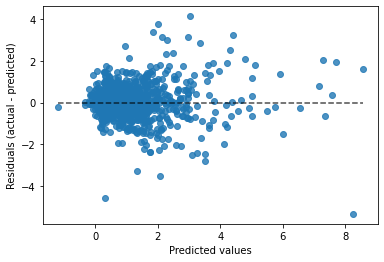

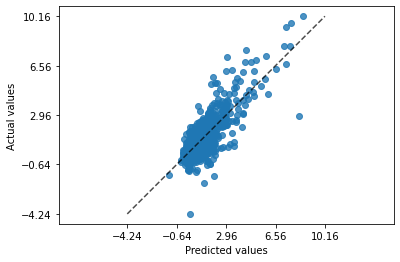

In [ ]:
# Plot the prediction error given the true and predicted targets - default/initial

disp1_res_init = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_ts1, kind='residual_vs_predicted', random_state=42)
plt.show()

disp1_act_init = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_ts1, kind='actual_vs_predicted', random_state=42)
plt.show()


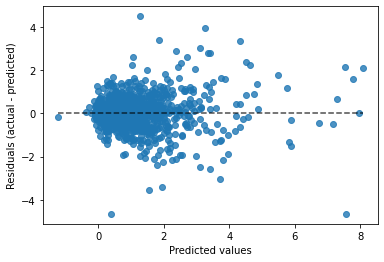

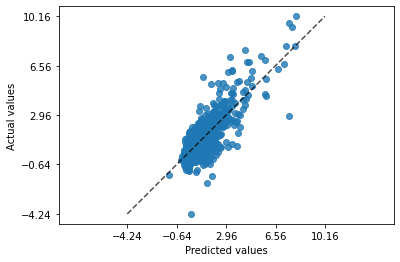

In [ ]:
# Plot the prediction error given the true and predicted targets - bayes

disp1_res_bayes = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_ts2, kind='residual_vs_predicted', random_state=42)
plt.show()

disp1_act_bayes = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_ts2, kind='actual_vs_predicted', random_state=42)
plt.show()


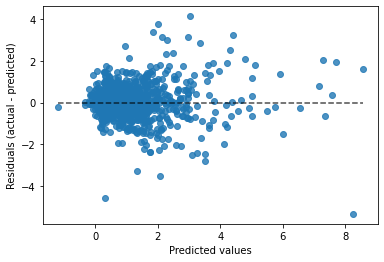

In [ ]:
# Plot the prediction error given a regressor and some data - initial

disp_pred_init = PredictionErrorDisplay.from_estimator(cat_model, X_test, y_test)
plt.show()

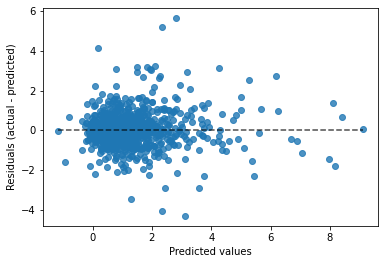

In [ ]:
# Plot the prediction error given a regressor and some data - bayes

disp_pred_bayes = PredictionErrorDisplay.from_estimator(cat_model_best, X_test, y_test)
plt.show()

**Uninstall and reinstall matplotlib due to yellowbrick error**

AttributeError: module 'matplotlib.cbook' has no attribute 'deprecated'

https://stackoverflow.com/questions/47571689/unable-to-use-matplotlib-functions-in-my-program

In [ ]:
# Prediction error - default/initial

# visualizer1a_pred = PredictionError(cat_model)
# visualizer1a_pred.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer1a_pred.score(X_val, y_val)  # Evaluate the model on the test data
# visualizer1a_pred.show()                 # Finalize and render the figure

In [ ]:
# Prediction error - bayes

# visualizer2a_pred = PredictionError(cat_model_best)
# visualizer2a_pred.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer2a_pred.score(X_val, y_val)  # Evaluate the model on the test data
# visualizer2a_pred.show()                 # Finalize and render the figure

In [ ]:
# Residuals error - default/initial

# visualizer1a_res = ResidualsPlot(cat_model)

# visualizer1a_res.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer1a_res.score(X_val, y_val)  # Evaluate the model on the test data
# visualizer1a_res.show()                 # Finalize and render the figure

In [ ]:
# Residuals error - bayes

# visualizer2a_res = ResidualsPlot(cat_model_best)

# visualizer2a_res.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer2a_res.score(X_val, y_val)  # Evaluate the model on the test data
# visualizer2a_res.show()                 # Finalize and render the figure

**MODEL EXPLAINABILITY - PARTIAL DEPENDENCE PLOTS (PDP) AND SHAP VALUES**
PDP - https://pdpbox.readthedocs.io/en/latest/pdp_plot.html

In [ ]:
features = ['Elevation (m)','Slope (°)','Aspect (°)','Surface Roughness','Topographic Position Index','Terrain Ruggedness Index','Terrain Surface Texture','Vector Ruggedness Measure','Urban Footprints','Tree Cover (%)','Bare Ground (%)']


In [ ]:
# Feature importance - default/initial
cat_model.feature_importances_

array([ 9.19983178,  2.89380888,  2.30094794, 11.83596296, 25.58513955,
        1.64212357, 19.66417917,  7.59649959,  6.99379774,  6.96544124,
        5.32226757])

<BarContainer object of 11 artists>

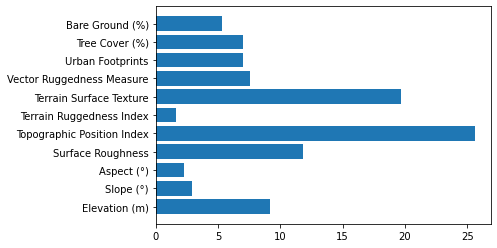

In [ ]:
# Plot feature importance - default/initial
plt.barh(features, cat_model.feature_importances_)

In [ ]:
# Feature importance - bayes
cat_model_best.feature_importances_

array([12.33120942,  5.58832643,  7.34468661,  5.83634409, 15.47804951,
        4.78496503, 14.51769505,  9.34098355, 10.3032132 ,  6.68312498,
        7.79140213])

<BarContainer object of 11 artists>

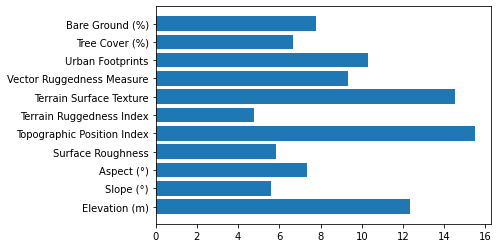

In [ ]:
# Plot feature importance - bayes
plt.barh(features, cat_model_best.feature_importances_)

**PDP - BAYES**

Intuitively, we can interpret the partial dependence as the expected target response as a function of the input features of interest. Due to the limits of human perception, the size of the set of input features of interest must be small (usually, one or two) thus **the input features of interest are usually chosen among the most important features**.
https://scikit-learn.org/stable/modules/partial_dependence.html

In [ ]:
data.columns

Index(['index', 'pointid', 'easting', 'northing', 'Land Type',
       'LiDAR Elevation (m)', 'Elevation Diff, ∆h (m)', 'Elevation (m)',
       'Slope (°)', 'Aspect (°)', 'Surface Roughness',
       'Topographic Position Index', 'Terrain Ruggedness Index',
       'Terrain Surface Texture', 'Vector Ruggedness Measure',
       'Urban Footprints', 'Tree Cover (%)', 'Bare Ground (%)', 'LC_code_20',
       'lc_2013_14'],
      dtype='object')

**Uninstall and reinstall matplotlib due to PDP error**

AttributeError: module 'matplotlib.cbook' has no attribute 'deprecated'

In [ ]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.7.1


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.8 MB/s eta 0:00:00


In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=241b37b4fcf1c92db5c878accac209fdb8cce6e19a49aa6c0773645f93cc9eb1
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060137 sha256=73378eaa32c0bab99de5273cdc8273ea733ef564d54a7d3150f7fa487a22e9af
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f4d0d245609b8c673a5ad
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=f7ed5c7

In [ ]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.1.1
Uninstalling matplotlib-3.1.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.1.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.1.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.1.1


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.


In [ ]:
from pdpbox import pdp, get_dataset, info_plots

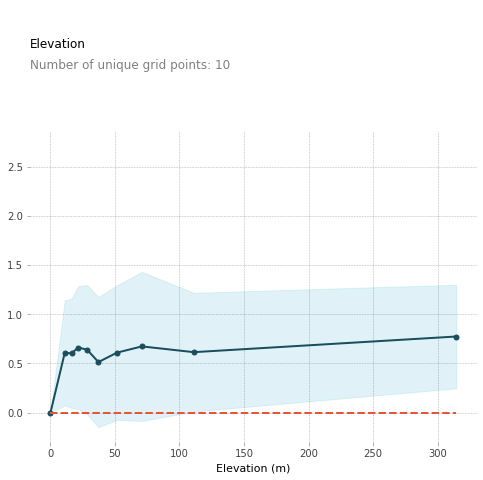

In [ ]:
# Show PDP plots for only most relevant features based on feature importance plot - e..g top 3 most impotant features, and 2 least features. or just the most improtant features
# PDP Plot - Elevation
# PDP Box https://pdpbox.readthedocs.io/en/latest/pdp_plot.html
# Do PDP on test set only

feature_to_plot = 'Elevation (m)' #1 x 1
pdp_elevation = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Elevation',           #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_elevation, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

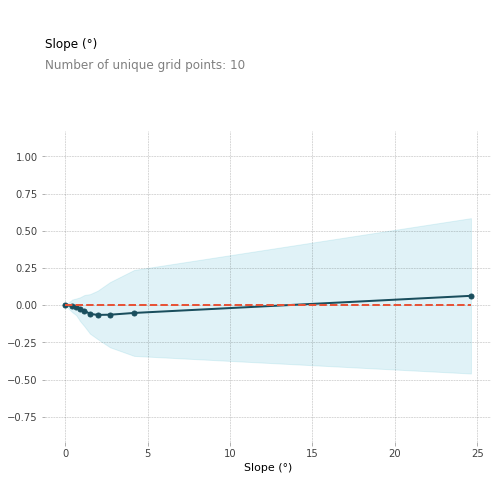

In [ ]:
# PDP Plot - Slope

feature_to_plot = 'Slope (°)' #1 x 1
pdp_slope = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Slope (°)',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_slope, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

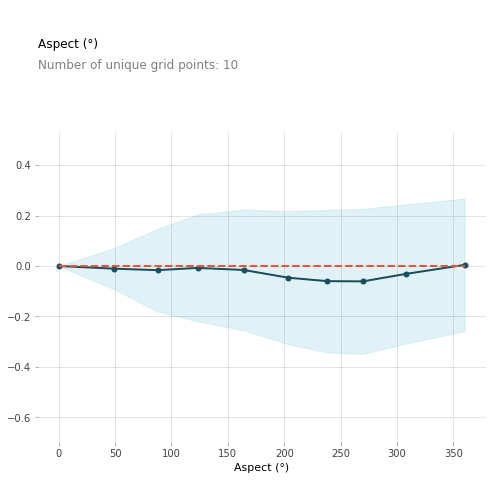

In [ ]:
# PDP Plot - Aspect

feature_to_plot = 'Aspect (°)' #1 x 1
pdp_aspect = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Aspect (°)',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_aspect, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

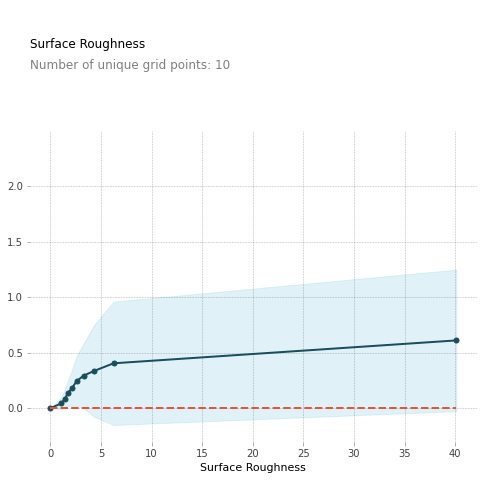

In [ ]:
# PDP Plot - Surface Roughness

feature_to_plot = 'Surface Roughness' #1 x 1
pdp_rough = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Surface Roughness',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_rough, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

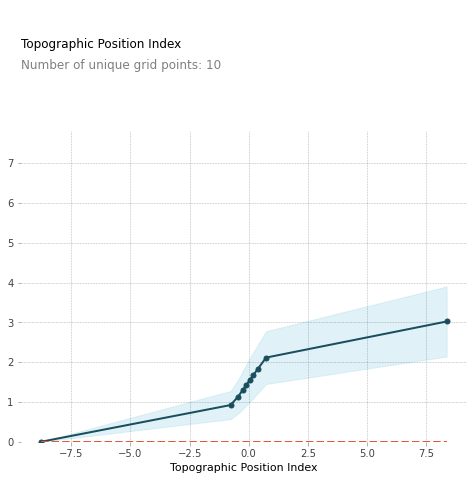

In [ ]:
# PDP Plot - TPI

feature_to_plot = 'Topographic Position Index' #1 x 1
pdp_tpi = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Topographic Position Index',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_tpi, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

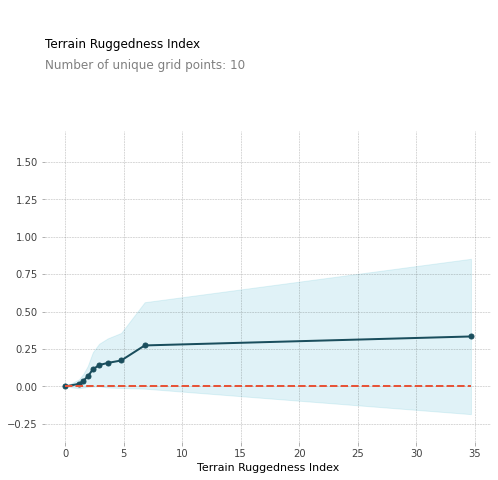

In [ ]:
# PDP Plot - TRI


feature_to_plot = 'Terrain Ruggedness Index' #1 x 1
pdp_tri = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Terrain Ruggedness Index',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_tri, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

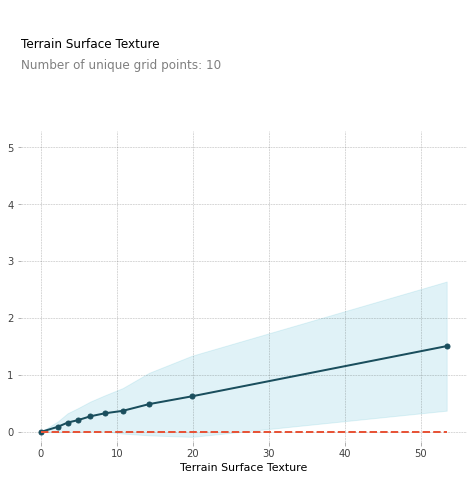

In [ ]:
# PDP Plot - TST


feature_to_plot = 'Terrain Surface Texture' #1 x 1
pdp_tst = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Terrain Surface Texture',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_tst, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

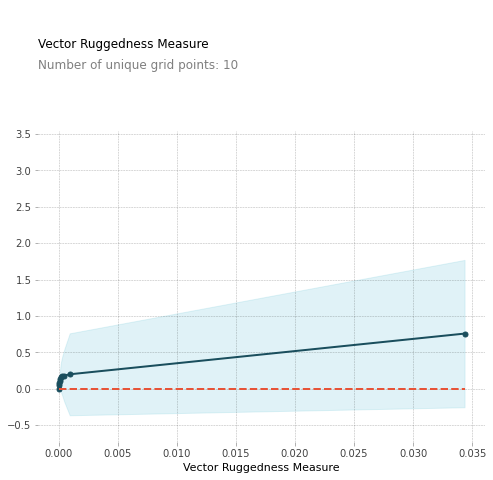

In [ ]:
# PDP Plot - VRM


feature_to_plot = 'Vector Ruggedness Measure' #1 x 1
pdp_vrm = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Vector Ruggedness Measure',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_vrm, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

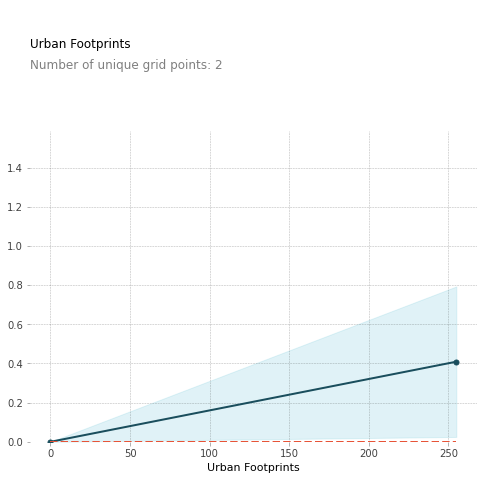

In [ ]:
# PDP Plot - GUF

feature_to_plot = 'Urban Footprints' #1 x 1
pdp_guf = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Urban Footprints',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_guf, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

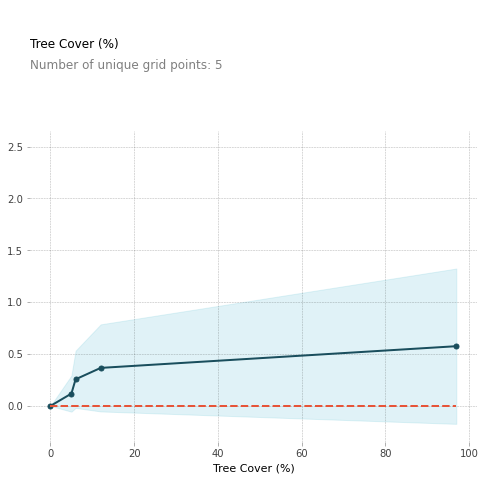

In [ ]:
# PDP Plot - Tree Cover (%)

feature_to_plot = 'Tree Cover (%)' #1 x 1
pdp_tree = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Tree Cover (%)',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_tree, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

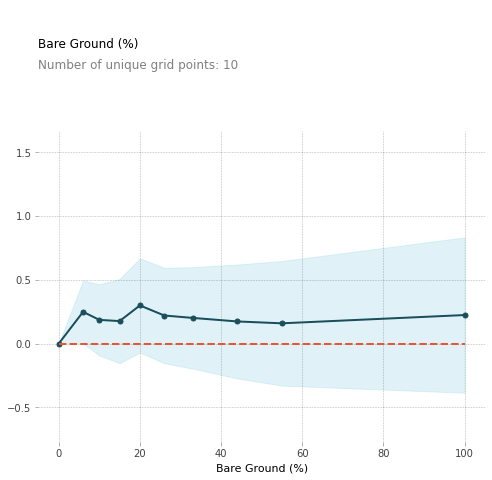

In [ ]:
# PDP Plot - Bare Ground (%)

feature_to_plot = 'Bare Ground (%)' #1 x 1
pdp_bare = pdp.pdp_isolate(model= cat_model_best, dataset=X_test, model_features=features, feature=feature_to_plot) #2 x 1
plot_params = {
    # plot title and subtitle
    'title': 'Bare Ground (%)',                             #3 x 1
    'title_fontsize': 12,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 2,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 5,
}
pdp.pdp_plot(pdp_bare, feature_to_plot, figsize=(8,8), plot_pts_dist=False, center=True, plot_lines=False, plot_params=plot_params)   #4 x 1
plt.show()

**SHAP VALUES (SHapley Additive exPlanations) - BAYES**



In [ ]:
# https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137
# **uses X_test for SHAP** - https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137
# **uses X_train for SHAP** - https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d
# **others**
# - https://www.section.io/engineering-education/how-to-analyze-machine-learning-models-using-shap/
# - https://www.vantage-ai.com/en/blog/burning-down-the-black-box-of-ml-using-shap

# package used to calculate Shap values
# Remember the SHAP model is built on the training data set.
# https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d
# https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

# GITHUB CODES
# shap doducmentaiton - https://shap.readthedocs.io/en/latest/index.html
# https://github.com/dataman-git/codes_for_articles/blob/master/Explain%20your%20model%20with%20the%20SHAP%20values%20for%20article.ipynb


# SHAP VALUES
import shap

In [ ]:
# Fits the explainer/Create object that can calculate shap values.
# (1) Create the 'explainer' using the model fit on the full training set, e.g. see (1) https://github.com/slundberg/shap (2) https://www.youtube.com/watch?v=CV9FTCvQ32Q (timestamp - 10:43)
# (2) Calculate shap values for the test set, e.g. (1) https://www.youtube.com/watch?v=ZkIxZ5xlMuI

start_time = time.time()
explainer = shap.Explainer(cat_model_best, seed=42) # same used by SHAP author, only include the model - https://github.com/slundberg/shap, note that xgb_model contains both preditor and target vaiables, so the explainer can understnad this realtionship
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0012712478637695312 seconds ---


In [ ]:
# Calculates the SHAP values. SHAP calculation time is lengthy, so your only choice is to run this on the test set, not the fulll data or train
# Note that this is being run on the test set
start_time = time.time()
shap_values = explainer(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Calc shap values for each row, or the full array
shap_values[0]

In [ ]:
# Variable Importance Plot — Global Interpretability
#  A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# SHAP Dependence Plot — Global Interpretability
# Summary plot: beeswarm
# In order to understand the importance or contribution of the features for the whole dataset, another plot can be used, the bee swarm plot:

shap.summary_plot(shap_values)

# OR use this: shap.plots.beeswarm(shap_values)

In [ ]:
# SHAP Dependence Plot — Global Interpretability
shap.plots.bar(shap_values)

In [ ]:
# SHAP Dependence Plot — Global Interpretability
# Summary plot: violin

shap.summary_plot(shap_values, plot_type='violin')

**# (C) SHAP Dependence Plot — SHAP Dependence Contribution Plots**
Explanation
- https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values
- https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html

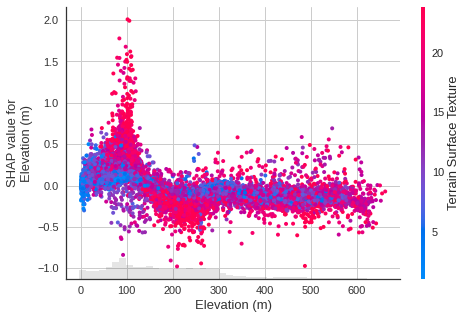

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Elevation (m)"], color=shap_values)

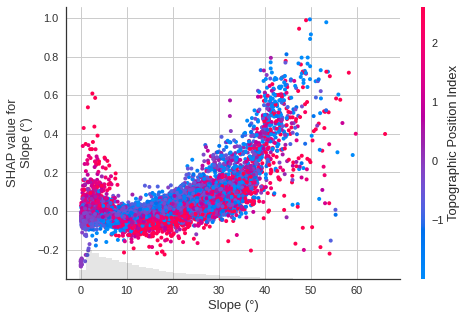

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Slope (°)"], color=shap_values)

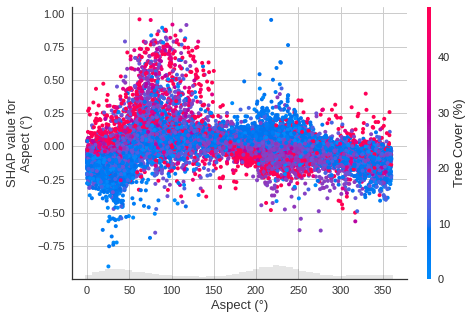

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Aspect (°)"], color=shap_values)

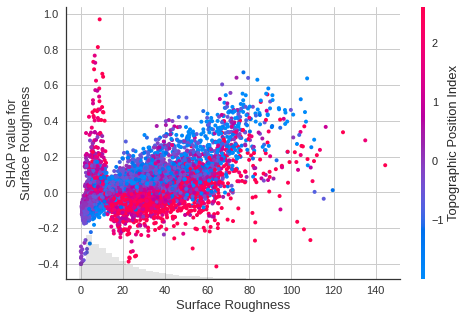

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Surface Roughness"], color=shap_values)

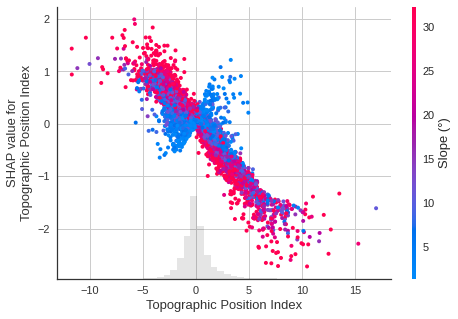

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Topographic Position Index"], color=shap_values)

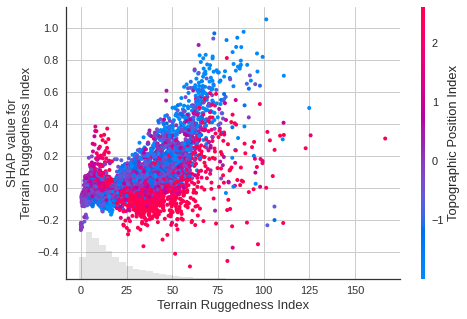

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Terrain Ruggedness Index"], color=shap_values)

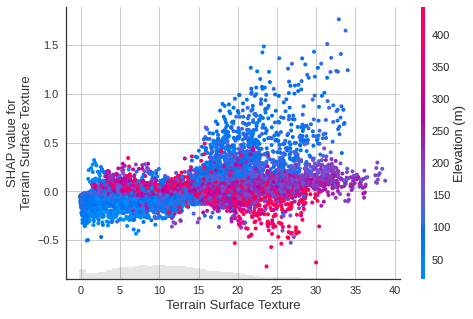

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Terrain Surface Texture"], color=shap_values)

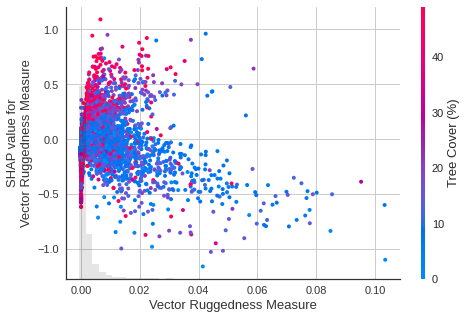

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Vector Ruggedness Measure"], color=shap_values)

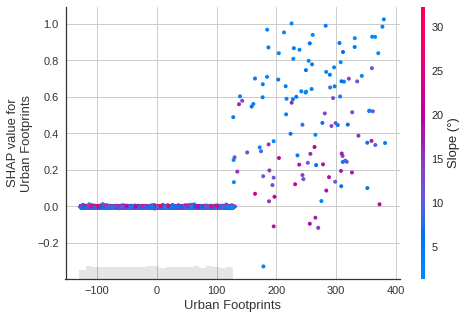

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Urban Footprints"], color=shap_values)

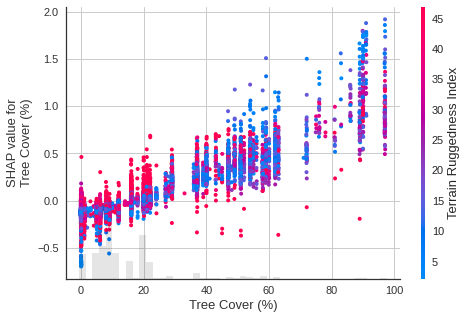

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Tree Cover (%)"], color=shap_values)

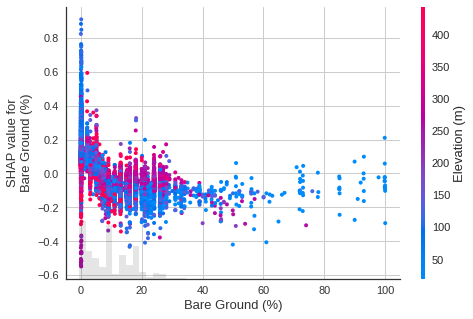

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Bare Ground (%)"], color=shap_values)

**SAVE MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# save model with joblib - intial
joblib.dump(cat_model, "/content/drive/My Drive/default_cat_cop_urban_2023.joblib")

['/content/drive/My Drive/default_cat_cop_urban_2023.joblib']

In [ ]:
# save model with joblib - bayes
joblib.dump(cat_model_best, "/content/drive/My Drive/bayes_cat_cop_urban_2023.joblib")

['/content/drive/My Drive/bayes_cat_cop_urban_2023.joblib']

**SITE B IMPLEMENTATION - INITIAL**

In [ ]:
# Load models

default_model = joblib.load("/content/drive/My Drive/default_cat_cop_urban_2023.joblib")

In [ ]:
bayes_model = joblib.load("/content/drive/My Drive/bayes_cat_cop_urban_2023.joblib")

In [ ]:
# Import implementation site t2
from google.colab import files
uploaded = files.upload()

Saving LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_t13_C.csv to LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_t13_C.csv


In [ ]:
# specify predictor variables t2
datat2 = pd.read_csv("LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_t13_C.csv")
datat2 = datat2.reset_index()
Xt2,yt2 = datat2.iloc[:,7:18], datat2.iloc[:,6]
yt2

0         0.743000
1         1.138603
2         0.862499
3         1.785700
4         0.174301
           ...    
23036    10.693398
23037     7.816002
23038    10.440903
23039     7.722000
23040     7.866199
Name: Elevation Diff, ∆h (m), Length: 23041, dtype: float64

count    23041.000000
mean         1.311739
std          1.446131
min         -7.368801
25%          0.518299
50%          1.051899
75%          1.742302
max         26.379097
Name: Elevation Diff, ∆h (m), dtype: float64

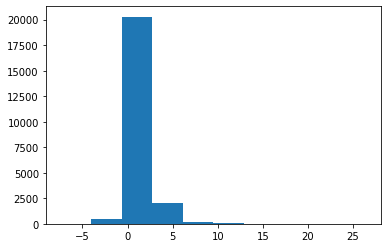

In [ ]:
# CHECKPOINT - explore X and y, all columns

plt.hist(yt2)
Xt2.describe() # for summary stats
yt2.describe()

In [ ]:
# Import implementation site v2
from google.colab import files
uploaded = files.upload()

Saving LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v12_C.csv to LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v12_C.csv


In [ ]:
# specify predictor variables v2
datav2 = pd.read_csv("LIDAR_30m_cubic_pts_clean_parameters_egm08_clean_v12_C.csv")
datav2 = datav2.reset_index()
Xv2,yv2 = datav2.iloc[:,7:18], datav2.iloc[:,6]
Xv2

,Elevation (m),Slope (°),Aspect (°),Surface Roughness,Topographic Position Index,Terrain Ruggedness Index,Terrain Surface Texture,Vector Ruggedness Measure,Urban Footprints,Tree Cover (%),Bare Ground (%)
0,17.8384,0.818009,61.3392,1.259760,0.145767,1.172770,3.51444,5.500000e-05,255,0,24
1,19.2555,1.165090,179.3780,1.752650,0.244593,1.687810,3.48169,1.179280e-04,255,5,24
2,15.9254,0.385991,350.5920,1.600520,-0.163363,1.332940,2.64087,1.525750e-04,255,0,28
3,15.9125,0.637091,256.6080,1.168190,-0.121763,0.984797,2.67487,3.510000e-05,255,0,28
4,17.2342,0.489860,94.4994,1.160280,-0.503548,1.739630,2.78010,9.360000e-05,255,5,24
...,...,...,...,...,...,...,...,...,...,...,...
22983,14.0000,0.004282,229.9530,0.014825,0.001579,0.013773,2.56752,5.230000e-09,0,0,33
22984,14.0000,0.001976,135.0000,0.005854,-0.000731,0.005854,2.88436,6.320000e-08,0,5,16
22985,18.1112,4.318130,162.9580,7.602300,0.621832,7.087410,12.01730,2.335420e-03,255,0,55
22986,15.3377,2.641530,272.1630,3.686800,-0.883770,4.162960,9.96809,3.434160e-04,255,0,11


count    22988.000000
mean         0.957608
std          1.127346
min        -11.842740
25%          0.370982
50%          0.844700
75%          1.347500
max         12.201599
Name: Elevation Diff, ∆h (m), dtype: float64

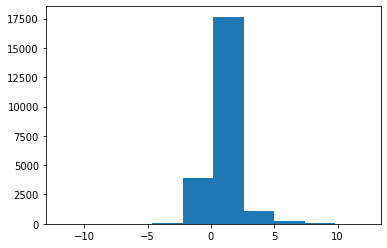

In [ ]:
# CHECKPOINT - explore X and y, all columns

plt.hist(yv2)
Xv2.describe() # for summary stats
yv2.describe()

In [ ]:
# Make a prediction - initial t2
start_time = time.time()
y_pred_init_t2 = default_model.predict(Xt2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.009369134902954102 seconds ---


In [ ]:
# Make a prediction - initial v2
start_time = time.time()
y_pred_init_v2 = default_model.predict(Xv2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.008971214294433594 seconds ---


In [ ]:
# Make a prediction - bayes t2
start_time = time.time()
y_pred_bayes_t2 = bayes_model.predict(Xt2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09803581237792969 seconds ---


In [ ]:
# Make a prediction - bayes v2
start_time = time.time()
y_pred_bayes_v2 = bayes_model.predict(Xv2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09086847305297852 seconds ---


In [ ]:
# append new predictions to csv file - initial t2
datat2["HEM_init"] = y_pred_init_t2
datat2.to_csv("/content/drive/My Drive/LIDAR_30m_egm08_clean_t2_t13_C_HEM_init_pred_cat_urban.csv", index = False)

In [ ]:
# append new predictions to csv file - initial v2
datav2["HEM_init"] = y_pred_init_v2
datav2.to_csv("/content/drive/My Drive/LIDAR_30m_egm08_clean_v2_v12_C_HEM_init_pred_cat_urban.csv", index = False)

In [ ]:
# append new predictions to csv file - bayes t2
datat2["HEM_bayes"] = y_pred_bayes_t2
datat2.to_csv("/content/drive/My Drive/LIDAR_30m_egm08_clean_t2_t13_C_HEM_bayes_pred_cat_urban.csv", index = False)

In [ ]:
# append new predictions to csv file - bayes v2
datav2["HEM_bayes"] = y_pred_bayes_v2
datav2.to_csv("/content/drive/My Drive/LIDAR_30m_egm08_clean_v2_v12_C_HEM_bayes_pred_cat_urban.csv", index = False)

**COMPLEXITY AND SCALABILITY**

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [ ]:
# Scalability of the predictive models in terms of training and scoring times.

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "n_jobs": -1,
    "return_times": True,
}

train_sizes, _, test_scores_xgb_model, fit_times_xgb_model, score_times_xgb_model = learning_curve(
    xgb_model, **common_params
)
train_sizes, _, test_scores_xgb_model_best, fit_times_xgb_model_best, score_times_xgb_model_best = learning_curve(
    xgb_model_best, **common_params
)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_xgb_model, fit_times_xgb_model_best],
        [score_times_xgb_model, score_times_xgb_model_best],
        [xgb_model, xgb_model_best],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__}"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

In [ ]:
 # Trade-off between increased training time and the cross-validation score.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for ax_idx, (fit_times, test_scores, estimator) in enumerate(
    zip(
        [fit_times_xgb_model, fit_times_xgb_model_best],
        [test_scores_xgb_model, test_scores_xgb_model_best],
        [xgb_model, xgb_model_best],
    )
):
    ax[ax_idx].plot(fit_times.mean(axis=1), test_scores.mean(axis=1), "o-")
    ax[ax_idx].fill_between(
        fit_times.mean(axis=1),
        test_scores.mean(axis=1) - test_scores.std(axis=1),
        test_scores.mean(axis=1) + test_scores.std(axis=1),
        alpha=0.3,
    )
    ax[ax_idx].set_ylabel("Accuracy")
    ax[ax_idx].set_xlabel("Fit time (s)")
    ax[ax_idx].set_title(
        f"Performance of the {estimator.__class__.__name__}"
    )

plt.show()

RESERVE



# Model scalability

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

PLOT IT LIKE THIS - https://www.mdpi.com/mathematics/mathematics-08-00851/article_deploy/html/images/mathematics-08-00851-g005.png


#  Imports
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve


#  (1)  sklearn.model_selection.learning_curve - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve

train_size_abs, train_scores, test_scores = learning_curve(xgb_model, X, y, train_sizes=[0.3, 0.6, 0.9])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
     print(f"{train_size} samples were used to train the model")
     print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
     print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


      #  read this link for good explanation of bia, variance, learning curves and how to sp;it your data for a learning curve
 #  https://www.dataquest.io/blog/learning-curves-machine-learning/

# explanation of the 'neg' in sklearn metrics https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated
#  OBSERVATION
#  1. My data has variance, increasing  the size of training data could improve performance - https://www.youtube.com/watch?v=yr_qzEzhwqM

#  (2) MSE sklearn.model_selection.LearningCurveDisplay - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator
#  shpuld we pass in X or X_train...
#  dont bother about the negative sign, iterprete it as if the negative sig ddnt exist, crop it off - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter



 #  read this link for good explanation of bia, variance, learning curves and how to sp;it your data for a learning curve
 #  https://www.dataquest.io/blog/learning-curves-machine-learning/

# explanation of the 'neg' in sklearn metrics https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated
#  OBSERVATION
#  1. My data has variance, increasing  the size of training data could improve performance - https://www.youtube.com/watch?v=yr_qzEzhwqM

#  (2) MSE sklearn.model_selection.LearningCurveDisplay - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator
#  shpuld we pass in X or X_train...
#  dont bother about the negative sign, iterprete it as if the negative sig ddnt exist, crop it off - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


#  (2) RMSE sklearn.model_selection.LearningCurveDisplay - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator
#  shpuld we pass in X or X_train...
#  dont bother about the negative sign, iterprete it as if the negative sig ddnt exist, crop it off - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter





LEARNING CURVES:
1. Yellowbricks - https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html
2. sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay.from_estimator
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html#sklearn.model_selection.LearningCurveDisplay

# RESERVE - LEARNING CURVES





# (3) - Yellowbricks learning curve - https://towardsdatascience.com/plotting-the-learning-curve-with-a-single-line-of-code-90a5bbb0f48a

!pip install yellowbrick
from yellowbrick.model_selection import learning_curve
print(learning_curve(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error'))

# (4) Yelowbricks validation curve - https://towardsdatascience.com/plotting-the-learning-curve-with-a-single-line-of-code-90a5bbb0f48a

from yellowbrick.model_selection import validation_curve

print(validation_curve(xgb_model, X, y, param_name="max_depth", n_jobs=-1, param_range=np.arange(1, 11), cv=5, scoring="neg_mean_absolute_error"))

# - https://www.datacamp.com/tutorial/tutorial-learning-curves


train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 10000, 25000, 37000, 50000, 62000, 75000, 100000, 112000, 120000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="test")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()







# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))



# define new data
new_data = pd.read_csv("LIDAR_43.csv")
new_data1 = new_data.iloc[:,9:13]
# make a prediction
ypred = model.predict(new_data1)

# create new csv file with predictions
# from google.colab import drive
# drive.mount('/content/drive')
# ypred_df = pd.DataFrame(ypred)
# ypred_df.to_csv('/content/drive/My Drive/test_preds.csv')

# append new predictions to test data csv file
from google.colab import drive
drive.mount('/content/drive')
new_data1["N_HEM_predicted_43_"] = ypred
submission = new_data1[["N_tpi","N_HEM_predicted_43_"]]
submission.to_csv("/content/drive/My Drive/N_HEM_predicted_43_.csv", index = False)


#xgboost hyperparamtere docs - https://xgboost.readthedocs.io/en/stable/parameter.html
# Hyper Parameter Optimization
# xgb_search_grid={'n_estimators':[2],'learning_rate':[1],'max_depth':[2],'min_child_weight':[1],'subsample':[0.001],'colsample_bytree':[1],'colsample_bylevel':[1],'reg_lambda':[0.001]}
# xgb_grid = GridSearchCV(estimator=xgb_model, param_grid = xgb_search_grid, n_jobs=1)
# xgb_grid.fit(X,y)
# xgb_grid.best_params_
# xgb_grid.best_score_

#xgb_search_grid={'n_estimators':[100,500,1000],'learning_rate':[0.1,0.5,1],'max_depth':[2,5,10],'min_child_weight':[2,5,10],'colsample_bytree':[0.1,0.5,1]}
#xgb_grid = GridSearchCV(estimator=xgb_model, param_grid = xgb_search_grid, n_jobs=1)
#xgb_grid.fit(X,y)
#xgb_grid.best_params_
#xgb_grid.best_score_

#print(" Results from xgboost Grid Search " )
#print("\n The best estimator across ALL searched params:\n", xgb_grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", xgb_grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", xgb_grid.best_params_)

# it worked with only 2 values in the grid, then only 3 values. now try 4
# RESERVE
# 'reg_lambda':[0.01,0.1,0.5,1]
# 'subsample':[0.001,0.005,0.01,0.1,0.5,1],'colsample_bytree':[0.001,0.005,0.01,0.1,0.5,1],'colsample_bylevel':[0.001,0.005,0.01,0.1,0.5,1],'reg_lambda':[0.001,0.005,0.01,0.1,0.5,1]

# xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, seed=123)
# xgb_model.fit(X, y)
# random_cv = RandomizedSearchCV(estimator=regressor,
           # param_distributions=hyperparameter_grid,
           # cv=5, n_iter=50,
           # scoring = 'neg_mean_absolute_error',n_jobs = 4,
           # verbose = 5,
           # return_train_score = True,
           # random_state=42)

# summarize prediction
print(ypred)


# RESERVE
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) # not necessary since i'm using crossvalidation
# xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)
# xg_reg.fit(X_train, y_train)
# preds = xg_reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test,preds))
# print("RMSE: %F" % (rmse))